# Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # For prototyping
import lightgbm as lgb  # Final model choice

# Set Up Display Options

In [4]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
%matplotlib inline

# Load the Synthetic Burnout Dataset

In [10]:
# Load the real dataset (ensure 'dataset.csv' is in your working directory)
data = pd.read_csv('dataset.csv')

# Preview the first 5 rows
data.head()

,user_id,date,sleep_hours,work_hours,screen_time_hours,heart_rate_avg,steps,burnout_label
0,U001,2024-01-01,7.38,7.78,5.01,67.7,5598,Low
1,U001,2024-01-02,7.62,5.59,2.28,67.8,4623,Low
2,U001,2024-01-03,7.66,6.80,1.86,67.5,7844,Low
3,U001,2024-01-04,7.23,7.61,2.85,71.5,5447,Low
4,U001,2024-01-05,5.88,7.98,5.81,75.9,6637,Moderate


#  Basic Dataset Exploration

In [11]:
# Check the shape and basic info
print("Shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nInfo:")
data.info()

# Check for missing values
print("\nMissing values:\n", data.isnull().sum())

# Check target distribution
print("\nBurnout label distribution:\n", data['burnout_label'].value_counts(normalize=True))


Shape: (4500, 8)

Columns: ['user_id', 'date', 'sleep_hours', 'work_hours', 'screen_time_hours', 'heart_rate_avg', 'steps', 'burnout_label']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            4500 non-null   object 
 1   date               4500 non-null   object 
 2   sleep_hours        4500 non-null   float64
 3   work_hours         4500 non-null   float64
 4   screen_time_hours  4500 non-null   float64
 5   heart_rate_avg     4500 non-null   float64
 6   steps              4500 non-null   int64  
 7   burnout_label      4500 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 281.4+ KB

Missing values:
 user_id              0
date                 0
sleep_hours          0
work_hours           0
screen_time_hours    0
heart_rate_avg       0
steps                0
burnout_label        0


# Visualize a Key Wellness Metric (Sleep Hours Example)

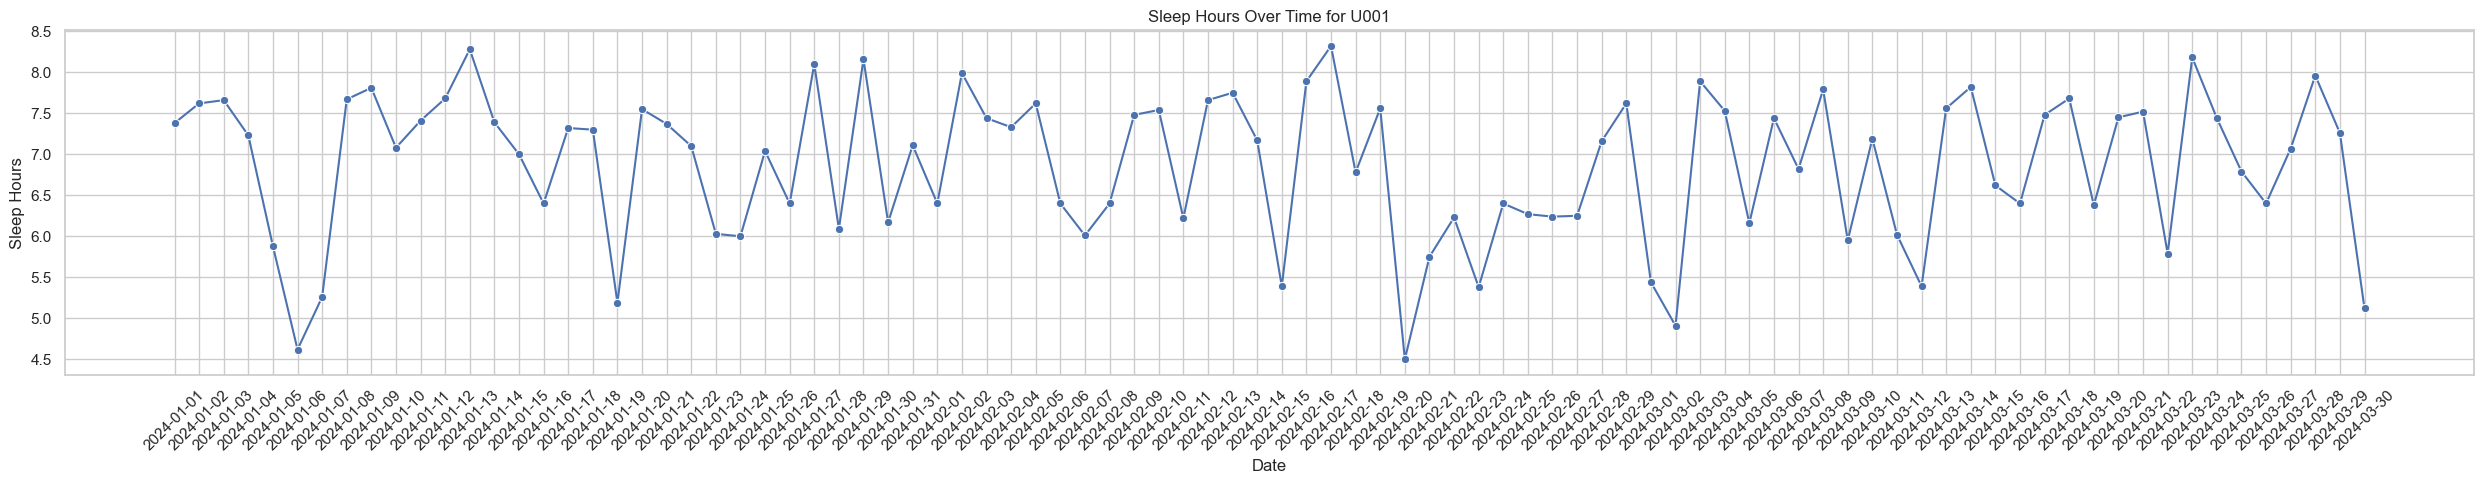

In [18]:
# Plot average sleep hours over time for a sample user
sample_user = data['user_id'].unique()[0]
user_data = data[data['user_id'] == sample_user]

plt.figure(figsize=(25,5))
sns.lineplot(x='date', y='sleep_hours', data=user_data, marker='o')
plt.title(f'Sleep Hours Over Time for {sample_user}')
plt.xlabel('Date')
plt.ylabel('Sleep Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Saved a Clean Copy for Reuse

In [19]:
# Save a clean copy (if you make changes later)
data.to_csv("burnout_dataset_clean.csv", index=False)